# The trilinear Higgs self-coupling in a simple $U_{B-L}(1)$ extension of the SM

In [1]:
from anyBSM import anyBSM
import anyBSM.plotting as plotting
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame

## Tree-level result

In [2]:
SM = anyBSM('SM', quiet=True)
BmL = anyBSM('BmLSM', quiet=True, progress=False, scheme_name="OSZp",caching=2)

ERROR:C0_p0(x,0,0) is IR divergent!
ERROR:C0_p0(x,0,0) is IR divergent!
ERROR:C0_p0(x,0,0) is IR divergent!


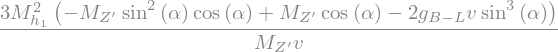

In [3]:
# re-calculate lambda_hhh and print the tree-level result
BmL.clear_cache()
BmL.lambdahhh()
list(BmL.treelevel.values())[0].simplify().trigsimp().together()

In [4]:
# ignore warnings about IR-divergent C0-functions (the diagrams invole vanishing couplings)
import logging
looplog=logging.getLogger('anyBSM.loopfunctions')
looplog.propagate=False
looplog.disabled=True

## Comparison of different renormalization schemes
 * OSZp: h1,h2 and Zp masses OS
 * OSZpAlpha: in addition also OS mixing angle
 * OSZpAlphaTad: same as OSZpAlpha but with OS tadpoles

In [5]:
BmL.setparameters({'Mh2': 250, 'gBL': 0.2, 'MZp': 2000,'Mnu4': 2000, 'Mnu5': 2000, 'Mnu6': 2000, 'alphaH': 0.1})

In [6]:
BmL.load_renormalization_scheme('OSZp')
print((BmL.lambdahhh(parameters={'Qren':1000})['total']-BmL.lambdahhh(parameters={'Qren':172.5})['total']).real)
print((BmL.lambdahhh(parameters={'Qren':10000})['total']-BmL.lambdahhh(parameters={'Qren':172.5})['total']).real)

-16.27201446288865
-37.5924836153788


In [7]:
BmL.load_renormalization_scheme('OSZpAlpha')
print((BmL.lambdahhh(parameters={'Qren':1000})['total']-BmL.lambdahhh(parameters={'Qren':172.5})['total']).real)
print((BmL.lambdahhh(parameters={'Qren':10000})['total']-BmL.lambdahhh(parameters={'Qren':172.5})['total']).real)

-0.013191036016365842
-0.030474641381459833


In [8]:
BmL.load_renormalization_scheme('OSZpAlphaTad')
print((BmL.lambdahhh(parameters={'Qren':1000})['total']-BmL.lambdahhh(parameters={'Qren':172.5})['total']).real)
print((BmL.lambdahhh(parameters={'Qren':10000})['total']-BmL.lambdahhh(parameters={'Qren':172.5})['total']).real)

-8.318100867654721e-05
-0.00019216924354736875


### Fixed $Z^{\prime}$ and $h_2$ mass but varying neutrino masses

In [9]:
Mval = np.linspace(500,6000,20)
norm = 187.2818
BmL.setparameters({'Mh2': 250, 'gBL': 0.2, 'MZp': 1400})
def qren(*m):
    return (sum(m)+173.)/(len(m)+1)

BmL.load_renormalization_scheme('OSZp')
lam01 = np.array([BmL.lambdahhh(parameters={'Qren': qren(M,1400,250),'Mnu4': M, 'Mnu5': M, 'Mnu6': M, 'alphaH': 0.1})['total'].real/norm for M in Mval])

BmL.load_renormalization_scheme('OSZpAlphaTad')
lam01tOS = np.array([BmL.lambdahhh(parameters={'Qren': qren(M,1400,250),'Mnu4': M, 'Mnu5': M, 'Mnu6': M, 'alphaH': 0.1})['total'].real/norm for M in Mval])


BmL.load_renormalization_scheme('OSZpAlpha')
lam01OS = np.array([BmL.lambdahhh(parameters={'Qren': qren(M,1400,250),'Mnu4': M, 'Mnu5': M, 'Mnu6': M, 'alphaH': 0.1})['total'].real/norm for M in Mval])

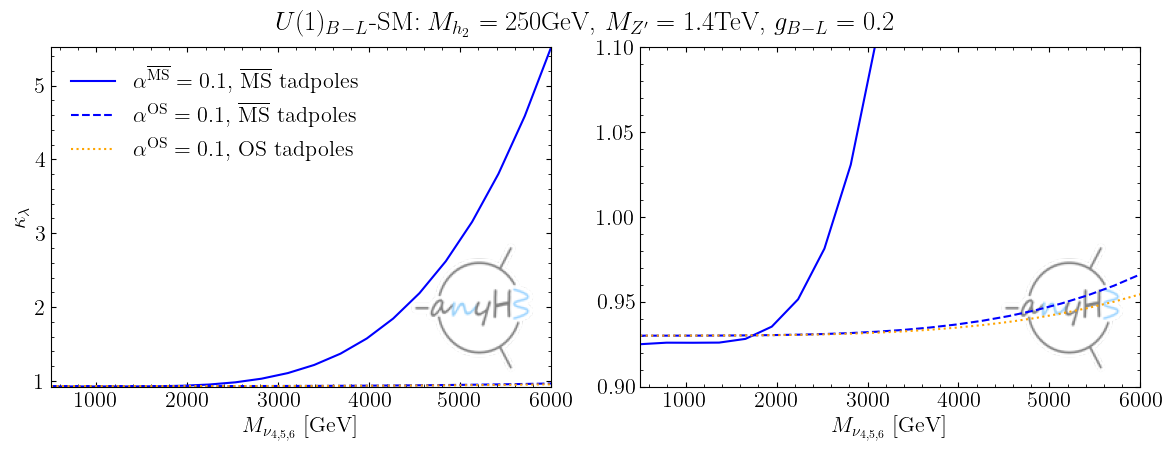

In [10]:
fig, ax = plt.subplots(1,2, sharex=True,figsize=(12,5),layout='tight')

ax[0].plot(Mval, lam01, label = r'$\alpha^{\overline{\mathrm{MS}}}=0.1$, $\overline{\mathrm {MS}}$ tadpoles', c='blue')
ax[0].plot(Mval, lam01OS, label = r'$\alpha^{\mathrm{OS}}=0.1$, $\overline{\mathrm {MS}}$ tadpoles', c='blue', ls='--')
ax[0].plot(Mval, lam01tOS, label = r'$\alpha^{{\mathrm {OS}}}=0.1$, OS tadpoles', c='orange', ls = ':')
# ax.hlines(0.941,Mval.min(),Mval.max(),label='SM',color='black',lw=1)
ax[0].set_xlabel(r'$M_{\nu_{4,5,6}}$ [GeV]')
ax[1].set_xlabel(r'$M_{\nu_{4,5,6}}$ [GeV]')
ax[0].set_ylabel(r'$\kappa_\lambda$')


ax[1].plot(Mval, lam01, label = r'$\alpha^{\overline{\mathrm{MS}}}=0.1$, $\overline{\mathrm {MS}}$ tadpoles', c='blue')
ax[1].plot(Mval, lam01OS, label = r'$\alpha^{\mathrm{OS}}=0.1$, $\overline{\mathrm {MS}}$ tadpoles', c='blue', ls='--')
ax[1].plot(Mval, lam01tOS, label = r'$\alpha^{{\mathrm {OS}}}=0.1$, OS tadpoles', c='orange', ls = ':')
ax[1].set_ylim(0.9,1.1)

ax[0].margins(0,0)
ax[0].legend(frameon=False)
fig.suptitle(r'$U(1)_{B-L}$-SM: $M_{h_2}=250$GeV, $M_{Z^\prime}=1.4$TeV, $g_{B-L}=0.2$',y=0.91);